<font face='serif' size=4>
<span style="line-height: 1.25;">

# HW7 for Statistics with Meteorological Application
---
Student: 林之然 (B11209005, 大氣二), 蔡知諺（B11209014, 大氣二）

<font face='serif' size=4>
<span style="line-height: 1.25;">

### 1. What are your explanatory (X) and response (Y) variables?

- Explanatory Variables (X): $T_\text{Hengchun}$
- Response Variables (Y): $T_\text{Taipei}$

<font face='serif' size=4>
<span style="line-height: 1.25;">

### 2. Use scatter plot and box plot to describe the apparent characteristics of the response (Y)

<font face='serif' size=4>
<span style="line-height: 1.25;">

#### Plot Distribution

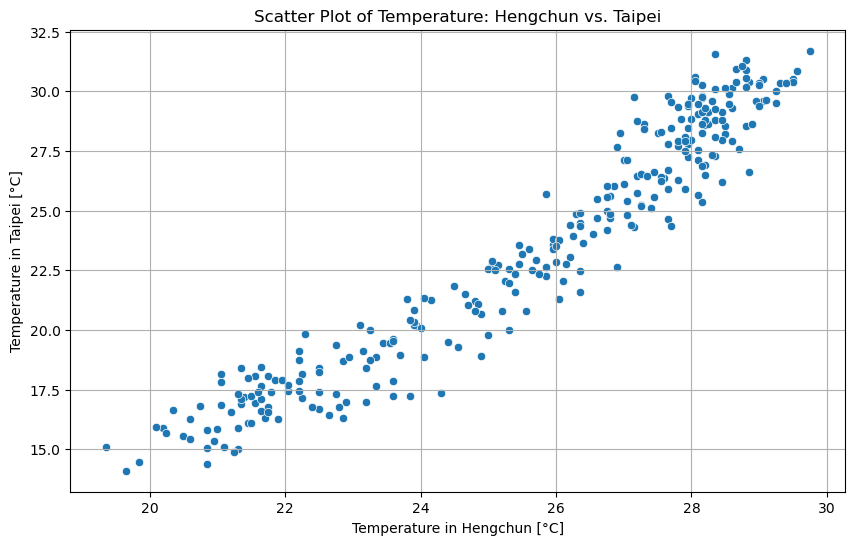

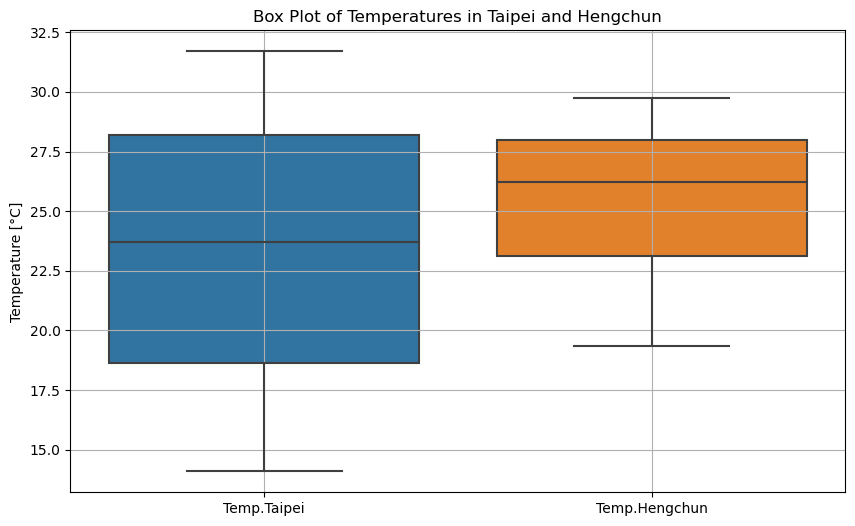

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the training data
training_data_path = 'Data_slr_training_hw.xlsx'
training_data = pd.read_excel(training_data_path)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp.Hengchun', y='Temp.Taipei', data=training_data)
plt.title('Scatter Plot of Temperature: Hengchun vs. Taipei')
plt.xlabel('Temperature in Hengchun [°C]')
plt.ylabel('Temperature in Taipei [°C]')
plt.grid(True)
plt.show()

# Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=training_data[['Temp.Taipei', 'Temp.Hengchun']])
plt.title('Box Plot of Temperatures in Taipei and Hengchun')
plt.ylabel('Temperature [°C]')
plt.grid(True)
plt.show()

<font face='serif' size=4>
<span style="line-height: 1.25;">

### 3. Build the least-squares linear model of your explanatory and response

<font face='serif' size=4>
<span style="line-height: 1.25;">

#### Fit Model

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data
X_train = training_data[['Temp.Hengchun']]
y_train = training_data['Temp.Taipei']

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Result
print(f"Regression Line: y = {slope:.4f} x + {intercept:.4f}")

Regression Line: y = 1.7441 x + -21.1337


<font face='serif' size=4>
<span style="line-height: 1.25;">

### 4. Please use R-squares to describe how strong is the linear relationship between your explanatory and response? How much of the variation in the response is explained by the explanatory variable?

In [29]:
# Predictions to calculate R-squared and correlation coefficient
predictions = model.predict(X_train)
r_squared = r2_score(y_train, predictions)
correlation_coefficient = np.corrcoef(y_train, predictions)[0, 1]

# Result
print(f"Correlation coeff. = {correlation_coefficient:.4f}")
print(f"R square = {r_squared:.4f}")

Correlation coeff. = 0.9624
R square = 0.9262


<font face='serif' size=4>
<span style="line-height: 1.25;">

### 5. Please describe the estimated accuracy of your regression model based on the testing data set. (what kind of measurement/index do you want to use?) Please introduce the index you use to estimate the accuracy.

<font face='serif' size=4>
<span style="line-height: 1.25;">

#### Verification

In [30]:
# Load the verification data
verification_data_path = 'Data_slr_verification_hw.xlsx'
verification_data = pd.read_excel(verification_data_path)

# Prepare the verification data
X_verification = verification_data[['Temp.Hengchun']]
y_verification_actual = verification_data['Temp.Taipei']

# Use the model to predict temperatures in Taipei based on Hengchun temperatures
y_verification_predicted = model.predict(X_verification)

# Calculate Mean Squared Error (MSE) and R-squared for the verification set
mse_verification = mean_squared_error(y_verification_actual, y_verification_predicted)
r_squared_verification = r2_score(y_verification_actual, y_verification_predicted)

print(f"MSE = {mse_verification:.4f} [°C²]")
print(f"R square = {r_squared:.4f}")

MSE = 1.3031 [°C²]
R square = 0.9262
